In [54]:
import numpy as np
import pandas as pd
import random
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [55]:
train_gen = ImageDataGenerator(rescale=1./255)

test_gen = ImageDataGenerator(rescale=1./255)

train_dir = "data/data/"
test_dir = "test"

train_data = train_gen.flow_from_directory(train_dir,batch_size=32,class_mode="binary",
                                          shuffle=True,target_size=(224,224))

test_data = test_gen.flow_from_directory(test_dir,class_mode="binary",batch_size=32,
                                        target_size=(224,224),shuffle=True)

Found 422 images belonging to 2 classes.
Found 8 images belonging to 1 classes.


In [122]:
model = Sequential()
model.add(Conv2D(32,3,strides=(1,1),activation='relu',input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=2,padding='valid'))

model.add(Conv2D(64,3,strides=(1,1),activation='relu'))
model.add(MaxPool2D(pool_size=2,padding='valid'))

model.add(Conv2D(32,3,strides=(1,1),activation='relu'))
model.add(MaxPool2D(pool_size=2,padding='valid'))

model.add(Conv2D(64,3,strides=(1,1),activation='relu'))
model.add(MaxPool2D(pool_size=2,padding='valid'))

model.add(Flatten())
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(150,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [123]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [124]:
stoping = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [125]:
model.fit(train_data,epochs=20,
         validation_data=test_data)
model.summary()

Epoch 1/20
14/14 [==============================] - 23s 2s/step - loss: 0.7031 - accuracy: 0.5332 - val_loss: 0.6798 - val_accuracy: 1.0000
Epoch 2/20
14/14 [==============================] - 19s 1s/step - loss: 0.6892 - accuracy: 0.5047 - val_loss: 0.6469 - val_accuracy: 1.0000
Epoch 3/20
14/14 [==============================] - 20s 1s/step - loss: 0.6523 - accuracy: 0.6280 - val_loss: 0.6572 - val_accuracy: 0.6250
Epoch 4/20
14/14 [==============================] - 20s 2s/step - loss: 0.5821 - accuracy: 0.7133 - val_loss: 0.8030 - val_accuracy: 0.3750
Epoch 5/20
14/14 [==============================] - 26s 2s/step - loss: 0.5023 - accuracy: 0.7654 - val_loss: 2.1973 - val_accuracy: 0.0000e+00
Epoch 6/20
14/14 [==============================] - 21s 1s/step - loss: 0.4530 - accuracy: 0.7962 - val_loss: 1.9249 - val_accuracy: 0.1250
Epoch 7/20
14/14 [==============================] - 21s 2s/step - loss: 0.4144 - accuracy: 0.8294 - val_loss: 1.4541 - val_accuracy: 0.2500
Epoch 8/20
14/14

<AxesSubplot:>

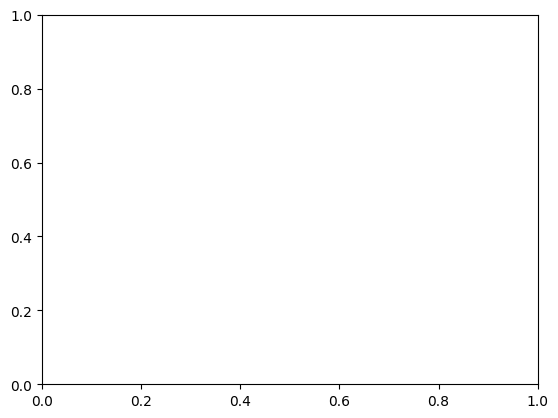

In [161]:
hist = pd.DataFrame(model.history.history)
sns.lineplot(hist)

In [127]:
model.evaluate(test_data)

1/1 [==============================] - 0s 114ms/step - loss: 3.7520 - accuracy: 0.2500


[3.752047538757324, 0.25]

In [128]:
path = pathlib.Path("tensor_data/")
class_name = np.array([item.name for item in path.glob("*")])
class_name

array(['Happy', 'Sad'], dtype='<U5')

In [129]:
def pre_image(filename,img_shape=224):
    img = tf.io.read_file(filename)
    de_code = tf.image.decode_image(img)
    resisze_img = tf.image.resize(de_code,size=[img_shape,img_shape])
    rescale = resisze_img/255.
    return rescale

In [157]:
pred_img = pre_image("sad_6.jpg")

In [158]:
pred_data = model.predict(tf.expand_dims(pred_img,axis=0))
pred_class = class_name[int(tf.round(pred_data))]

1/1 [==============================] - 0s 29ms/step


Text(0.5, 1.0, 'Happy')

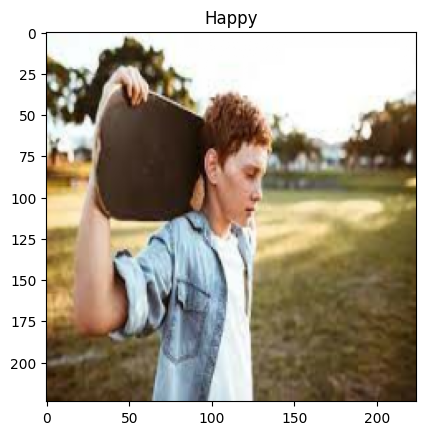

In [159]:
plt.imshow(pred_img)
plt.title(pred_class)

In [162]:
model.save("sad_happy_emotion_detection.h5")

In [163]:
model = tf.keras.models.load_model("sad_happy_emotion_detection.h5")

# Run model

In [165]:
def img_pre_process(filename,img_shape=224):
    img = tf.io.read_file(filename)
    de_code = tf.image.decode_image(img)
    resize = tf.image.resize(de_code,size=[img_shape,img_shape])
    rescale = resize/255.
    return rescale

In [191]:
pre_process_image = img_pre_process("sad_8.jpg")

In [192]:
pred_data = model.predict(tf.expand_dims(pre_process_image,axis=0))
pred_class_2 = class_name[int(tf.round(pred_data))]

1/1 [==============================] - 0s 30ms/step


(-0.5, 223.5, 223.5, -0.5)

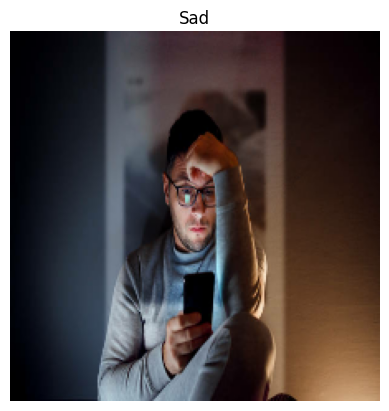

In [193]:
plt.imshow(pre_process_image)
plt.title(pred_class_2)
plt.axis("off")